# Import libraries

We import some libraries we need to do preprocessing until classification for wine quality. 

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import StratifiedKFold

# Read data

We read the dataset from csv format file.

In [2]:
df = pd.read_csv("wine_quality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Preprocessing data

## Check if there is null

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We found out that our dataset is not having missing value. So we don't have to handle any missing value.

## Information about our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We found out that most of the data type from our dataset is float and integer. 

## See the shape of the dataframe

In [5]:
df.shape

(1599, 12)

## Drop duplicates

We need to drop duplicate in our dataset. So, there is no redundant data and our dataset is good enough to create the model.

In [6]:
df.shape

(1599, 12)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

We already drop 240 duplicate data from our dataset

# Plot

## Quality

### Boxplot

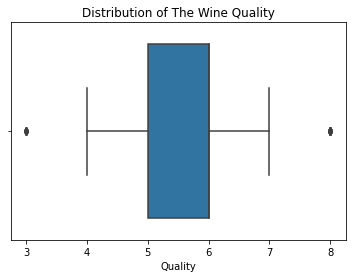

In [8]:
sns.boxplot(x=df["quality"])
plt.title("Distribution of The Wine Quality")
plt.xlabel("Quality")
plt.show()

### Displot

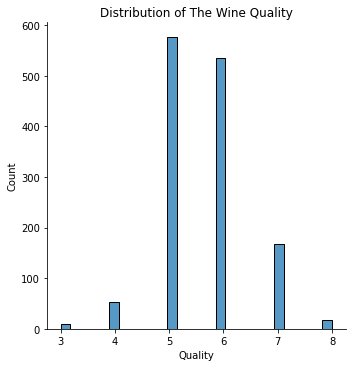

In [9]:
sns.displot(df, x="quality")
plt.title("Distribution of The Wine Quality")
plt.xlabel("Quality")
plt.show()

## Fixed Acidity

### Boxplot

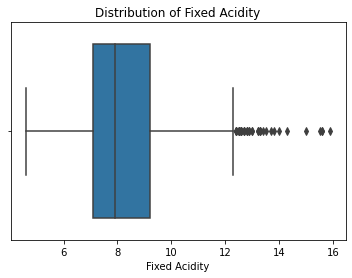

In [10]:
sns.boxplot(x=df["fixed acidity"])
plt.title("Distribution of Fixed Acidity")
plt.xlabel("Fixed Acidity")
plt.show()

### Displot

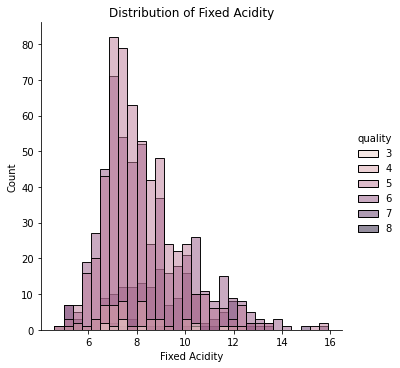

In [11]:
sns.displot(df, x="fixed acidity", hue="quality")
plt.title("Distribution of Fixed Acidity")
plt.xlabel("Fixed Acidity")
plt.show()

## Volatile Acidity

### Boxplot

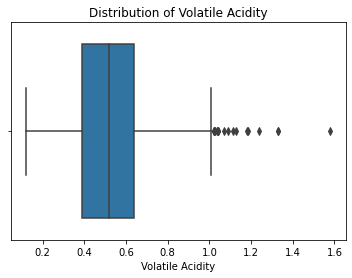

In [12]:
sns.boxplot(x=df["volatile acidity"])
plt.title("Distribution of Volatile Acidity")
plt.xlabel("Volatile Acidity")
plt.show()

### Displot

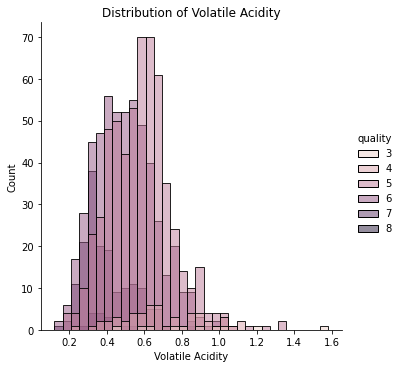

In [13]:
sns.displot(df, x="volatile acidity", hue="quality")
plt.title("Distribution of Volatile Acidity")
plt.xlabel("Volatile Acidity")
plt.show()

## Citric Acid

### Boxplot

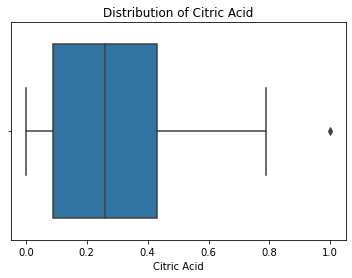

In [14]:
sns.boxplot(x=df["citric acid"])
plt.title("Distribution of Citric Acid")
plt.xlabel("Citric Acid")
plt.show()

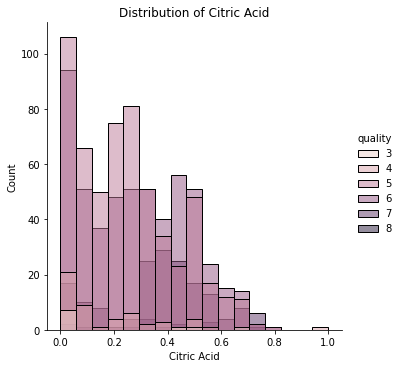

In [15]:
sns.displot(df, x="citric acid", hue="quality")
plt.title("Distribution of Citric Acid")
plt.xlabel("Citric Acid")
plt.show()

## Residual Sugar

### Boxplot

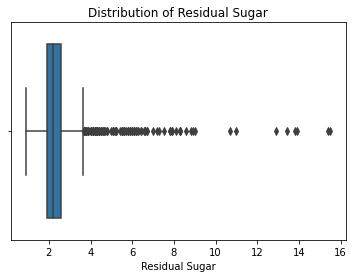

In [16]:
sns.boxplot(x=df["residual sugar"])
plt.title("Distribution of Residual Sugar")
plt.xlabel("Residual Sugar")
plt.show()

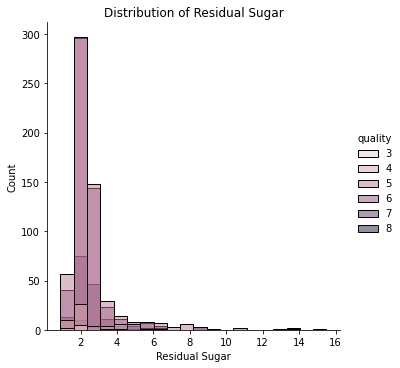

In [17]:
sns.displot(df, x="residual sugar", hue="quality", bins=20)
plt.title("Distribution of Residual Sugar")
plt.xlabel("Residual Sugar")
plt.show()

## Chlorides

### Boxplot

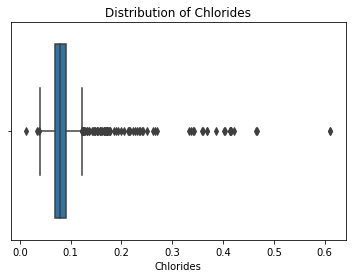

In [18]:
sns.boxplot(x=df["chlorides"])
plt.title("Distribution of Chlorides")
plt.xlabel("Chlorides")
plt.show()

### Displot

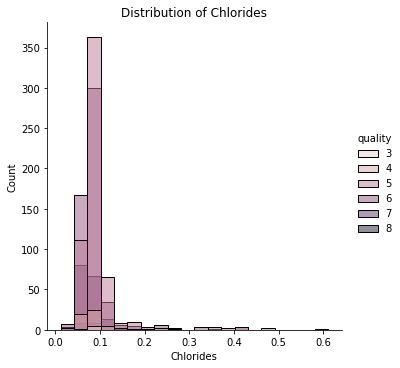

In [19]:
sns.displot(df, x="chlorides", hue="quality", bins=20)
plt.title("Distribution of Chlorides")
plt.xlabel("Chlorides")
plt.show()

## Free Sulfur Dioxide

### Boxplot

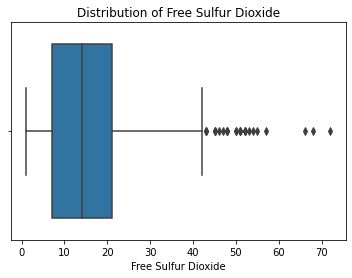

In [20]:
sns.boxplot(x=df["free sulfur dioxide"])
plt.title("Distribution of Free Sulfur Dioxide")
plt.xlabel("Free Sulfur Dioxide")
plt.show()

### Displot

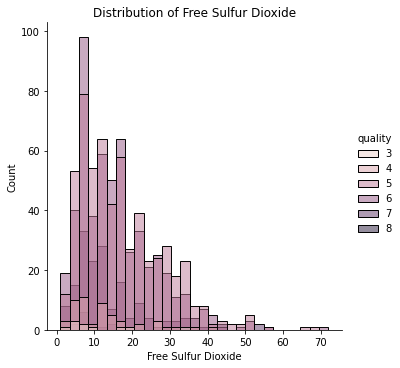

In [21]:
sns.displot(df, x="free sulfur dioxide", hue="quality")
plt.title("Distribution of Free Sulfur Dioxide")
plt.xlabel("Free Sulfur Dioxide")
plt.show()

## Total Sulfur Dioxide

### Boxplot

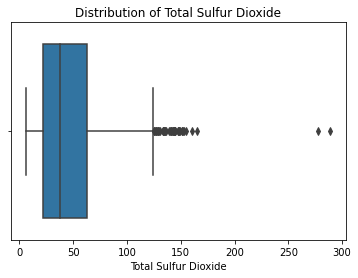

In [22]:
sns.boxplot(x=df["total sulfur dioxide"])
plt.title("Distribution of Total Sulfur Dioxide")
plt.xlabel("Total Sulfur Dioxide")
plt.show()

### Displot

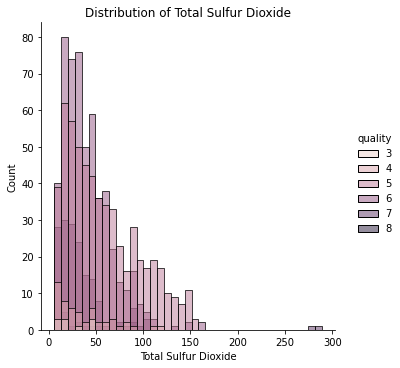

In [23]:
sns.displot(df, x="total sulfur dioxide", hue="quality")
plt.title("Distribution of Total Sulfur Dioxide")
plt.xlabel("Total Sulfur Dioxide")
plt.show()

## Density

### Boxplot

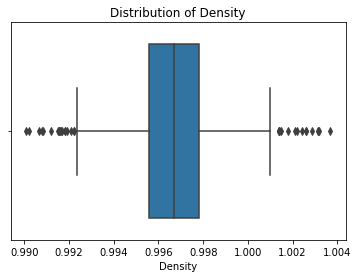

In [24]:
sns.boxplot(x=df["density"])
plt.title("Distribution of Density")
plt.xlabel("Density")
plt.show()

### Displot

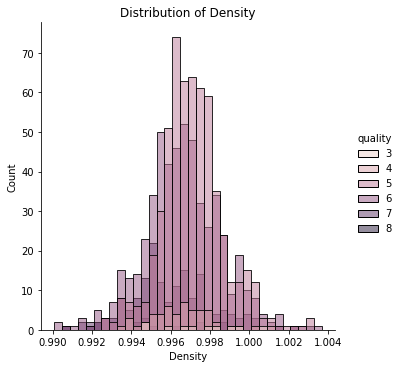

In [25]:
sns.displot(df, x="density", hue="quality")
plt.title("Distribution of Density")
plt.xlabel("Density")
plt.show()

## pH

### Boxplot

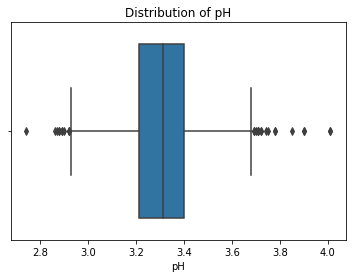

In [26]:
sns.boxplot(x=df["pH"])
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.show()

### Displot

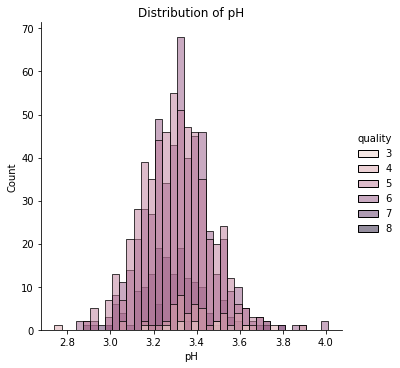

In [27]:
sns.displot(df, x="pH", hue="quality")
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.show()

## Sulphates

### Boxplot

<AxesSubplot:xlabel='sulphates'>

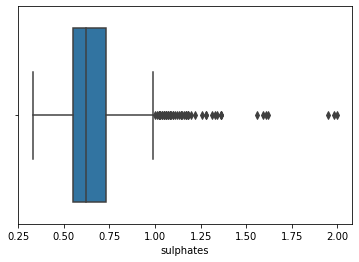

In [28]:
sns.boxplot(x=df["sulphates"])

### Displot

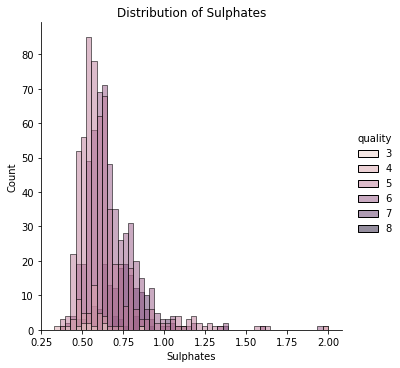

In [29]:
sns.displot(df, x="sulphates", hue="quality")
plt.title("Distribution of Sulphates")
plt.xlabel("Sulphates")
plt.show()

## Alcohol

### Boxplot

<AxesSubplot:xlabel='alcohol'>

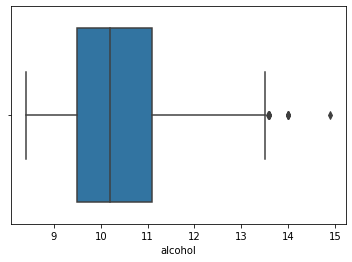

In [30]:
sns.boxplot(x=df["alcohol"])

### Displot

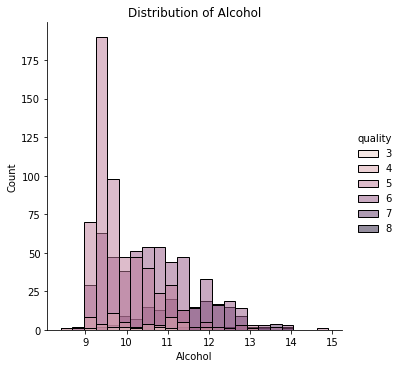

In [31]:
sns.displot(df, x="alcohol", hue="quality")
plt.title("Distribution of Alcohol")
plt.xlabel("Alcohol")
plt.show()

## Correllation of features

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

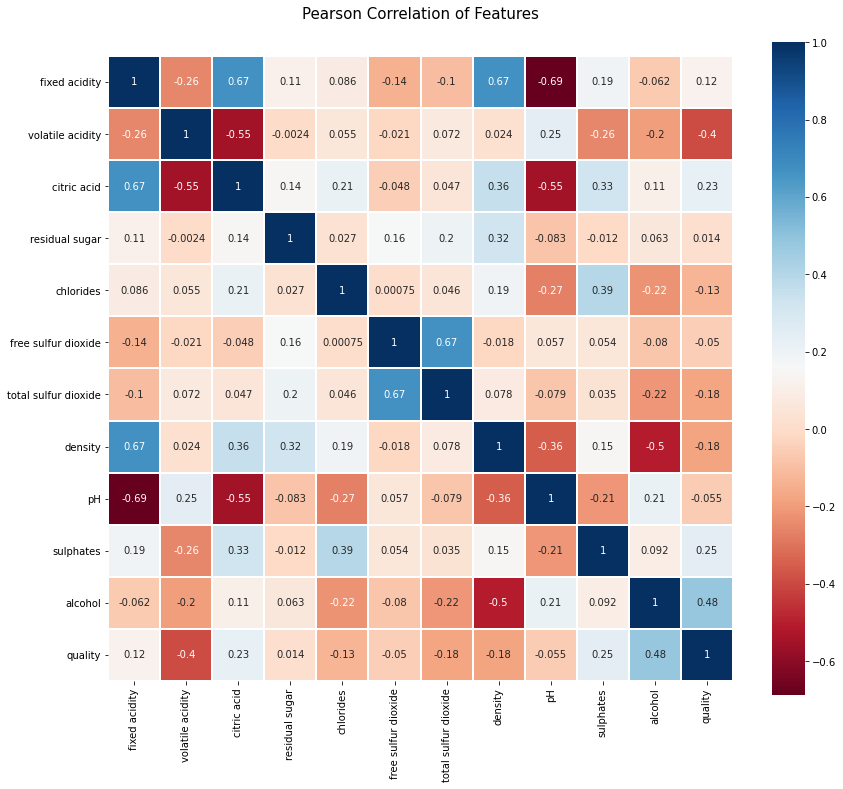

In [32]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Pairplot of dataframe

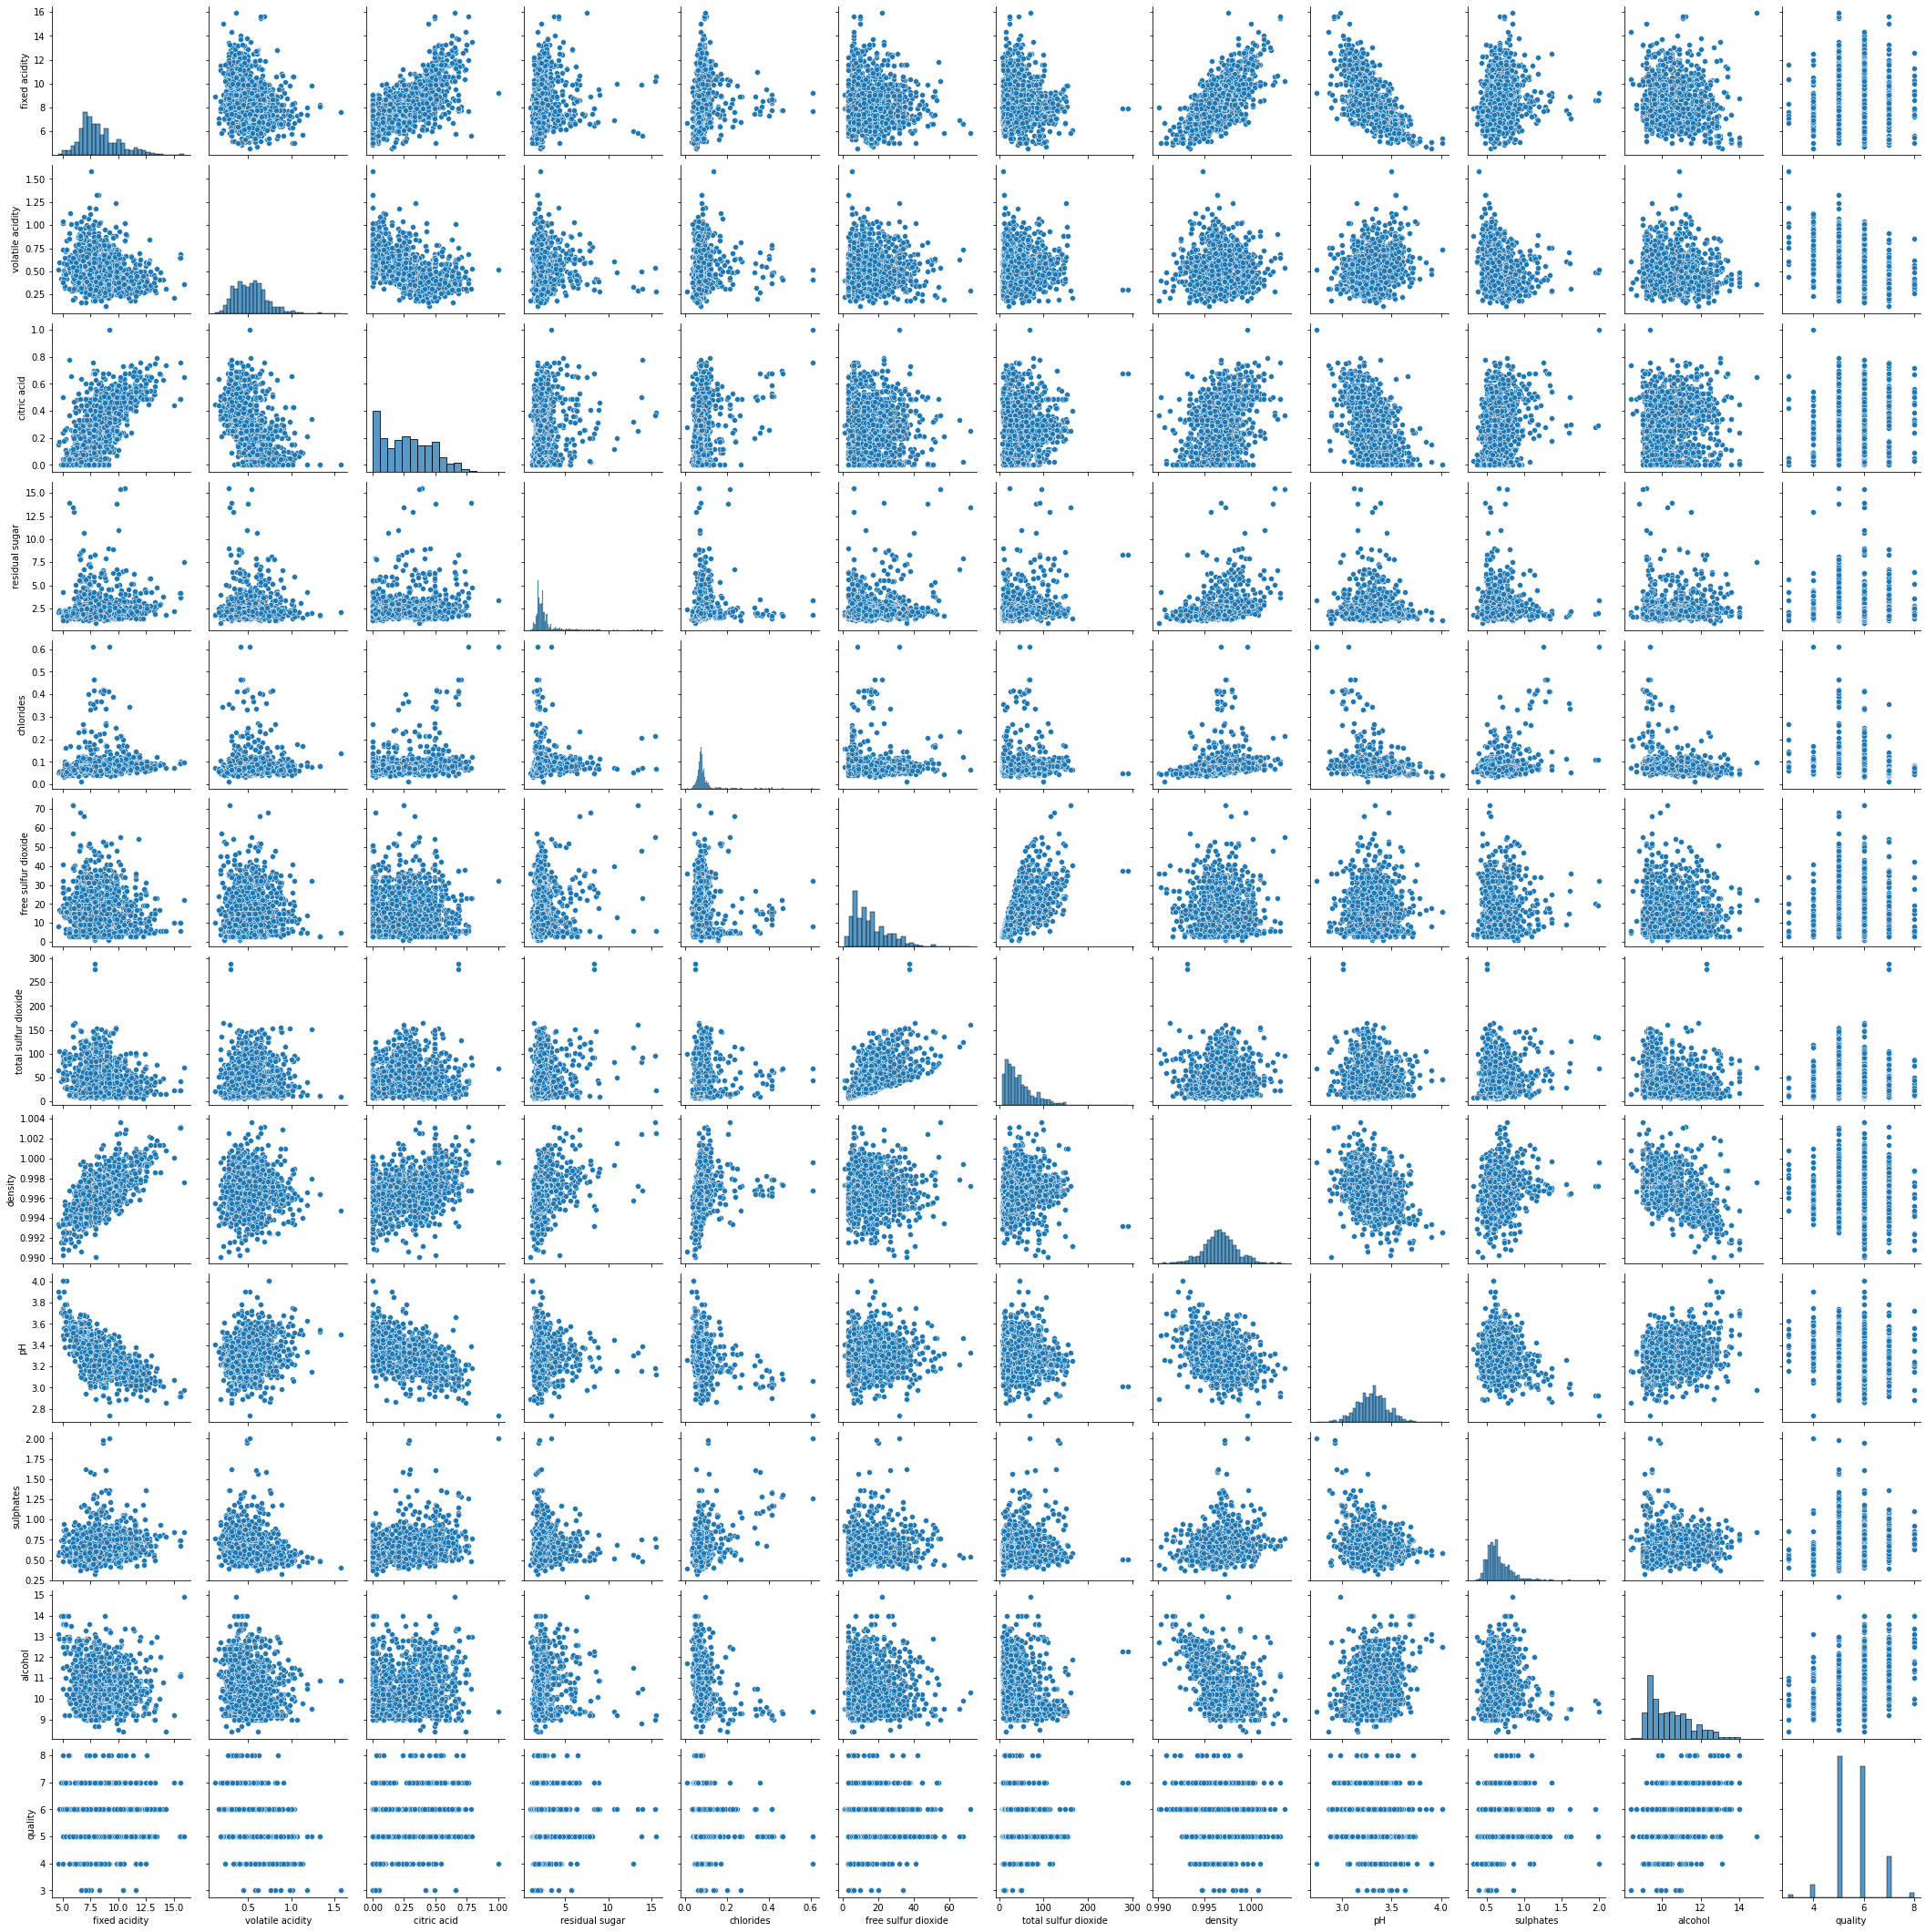

In [33]:
sns.pairplot(df)

## Remove outliers

We will remove some outliers we have in or dataset in purpose for getting clean data

In [34]:
z = np.abs(stats.zscore(df))
print(z)

[[0.52443096 0.93200015 1.39325797 ... 0.57856134 0.95437429 0.7570404 ]
 [0.29406274 1.91580043 1.39325797 ... 0.12482157 0.5845748  0.7570404 ]
 [0.29406274 1.25993358 1.18861732 ... 0.05102416 0.5845748  0.7570404 ]
 ...
 [1.38831178 0.11216658 0.88165635 ... 0.59374351 0.7097234  0.45762065]
 [1.38831178 0.63139451 0.77933603 ... 0.3006673  0.21477532 0.7570404 ]
 [1.33071973 1.19956712 1.01126962 ... 0.00759108 0.52482366 0.45762065]]


We set our threshold into 2, so we still have a plenty data and remove some outliers.

In [35]:
threshold = 2
print(np.where(z > 2))

(array([   8,   11,   12,   12,   13,   13,   15,   15,   17,   17,   30,
         30,   32,   35,   36,   38,   39,   41,   41,   41,   42,   42,
         49,   53,   73,   73,   75,   75,   75,   77,   77,   80,   80,
         80,   82,   82,   84,   84,   85,   85,   85,   86,   86,   86,
         87,   87,   87,   90,   96,   96,   96,   99,   99,  109,  114,
        115,  118,  119,  119,  121,  127,  127,  127,  129,  131,  135,
        135,  135,  135,  137,  137,  138,  138,  141,  142,  144,  144,
        145,  145,  150,  150,  159,  159,  166,  167,  168,  170,  172,
        175,  175,  176,  178,  178,  178,  182,  182,  183,  191,  191,
        195,  202,  202,  205,  208,  211,  211,  212,  214,  223,  226,
        226,  226,  229,  232,  233,  235,  235,  236,  241,  242,  242,
        242,  243,  245,  245,  245,  248,  251,  252,  255,  255,  258,
        259,  260,  268,  269,  273,  276,  282,  282,  285,  288,  291,
        294,  294,  294,  295,  295,  296,  296,  

In [36]:
df.shape

(1359, 12)

We create new dataframe that have been cleaned from some outliers.

In [37]:
df_clean = df[(z < 2).all(axis=1)]

In [38]:
df_clean.shape

(942, 12)

Now our dataset already remove 417 outliers. 

## Encode the quality of the wine

We encode the quality of the wine into 2 category, "Bad" and "Good".

In [39]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_clean['quality'] = pd.cut(df_clean['quality'], bins = bins, labels = group_names)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
label_quality = LabelEncoder()
df_clean['quality'] = label_quality.fit_transform(df_clean['quality'])
df_clean['quality'].value_counts()

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    838
1    104
Name: quality, dtype: int64

From encoding process, we have 839 bad wine and 104 good wine.

# Train and test split

We split our dataset into train and test data.

In [41]:
X = df_clean.drop(["quality"], axis=1)
y = df_clean["quality"]

## Scaling data

Before we split our dataset, we scaling our data that as a features (X) using StandarScaler then MinMaxScaler first.

In [42]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [43]:
mm_scaler = MinMaxScaler()
X = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

## Drop columns with low correlation with quality

### Correlation of features

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

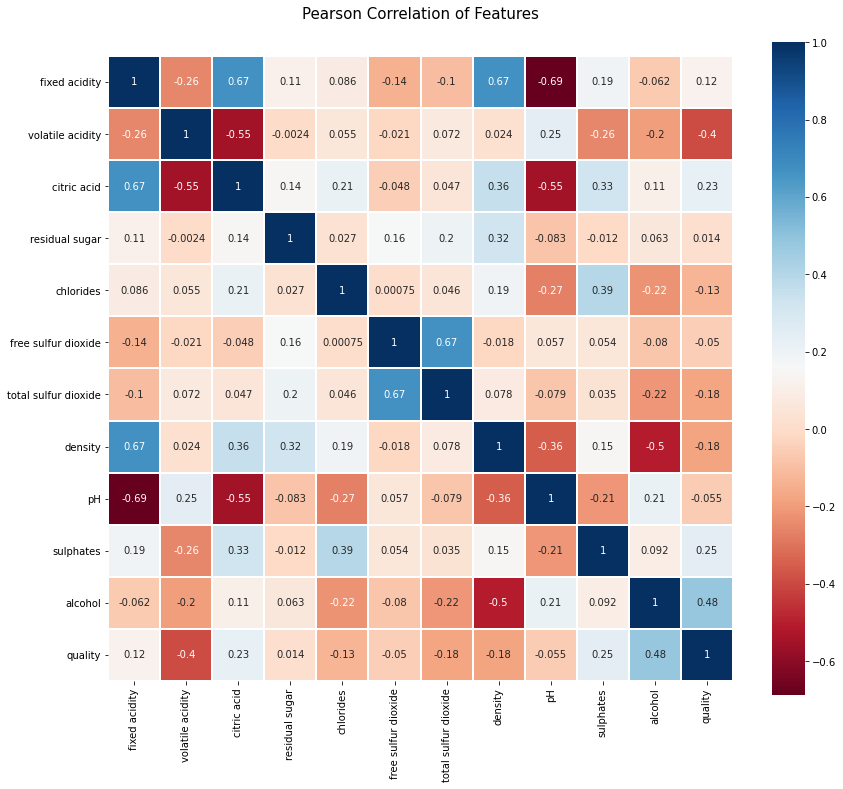

In [44]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Drop some features that have correlation with quality under 0.1.

In [45]:
X = X.drop(["residual sugar", "free sulfur dioxide", "pH"], axis=1)

We split our our dataset by 80% for train data and 20% for test data.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((753, 8), (189, 8), (753,), (189,))

# Find the best model

We will finding the best model by comparing some models to get the best model we will use.

## Some function for evaluate our models

In [47]:
def model_evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))

def cross_validation(x, y, model):
    result= cross_val_score(model, x, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    print("Cross Validation Score: %f" % result.mean())
    #return abs(result.mean())

For the number of the splits in our cross validation is 10 using StratifiedKFold.

In [48]:
kfold = StratifiedKFold(n_splits=10, random_state=14, shuffle=True)

We create a dictionary that contains our models include their parameters. We will comparing using GridSearchCV. Some models we will use there are Linear SVC, SVC, Logistic Regression, Perceptron, K-Nearest Neighbors, Decision Tree, Random Tree, and Gaussian Naive Bayes.

In [49]:
model_params = {
    "linear_svc": {
        "model": LinearSVC(),
        "params": {

        }
    },
    "svc": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10, 100],  
            "gamma": [1, 0.1, 0.01, 0.001, 0.0001], 
            "gamma":["scale", "auto"],
            "kernel": ["linear"]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [1,2,3,4,5,6],
            "max_iter": [100,200,300,400,500,1000,1500],
            "n_jobs": [-1]
        }
    },
    "perceptron": {
        "model": Perceptron(),
        "params": {
            "tol": [1e-1,1e-2,1e-3],
            "random_state": [0]
        }
    },
    "knn": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [1,2,3,4,5,6,7,8,9,10]
        }
    },
    "decision_tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["entropy","gini"],
            "random_state": [0]
        }
    },
    "random_tree": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [10,20,30,40,50,60,70,80,90,100],
            "criterion": ["entropy","gini"],
            "random_state": [0]
        } 
    },
    "gaussian_NB": {
        "model": GaussianNB(),
        "params": {

        }
    }
}

We will keep the best score and best parameters in a list.

In [50]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=kfold, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

We create a dataframe named score_df to see the result from GridSearchCV and find the best by sorted out the result by the best score. 

### Score dataframe

In [51]:
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df.sort_values(by="best_score", ascending=False)

,model,best_score,best_params
2,logistic_regression,0.899171,"{'C': 3, 'max_iter': 100, 'n_jobs': -1}"
4,knn,0.898074,{'n_neighbors': 8}
6,random_tree,0.897044,"{'criterion': 'entropy', 'n_estimators': 80, '..."
0,linear_svc,0.893886,{}
1,svc,0.889608,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
7,gaussian_NB,0.856641,{}
3,perceptron,0.853662,"{'random_state': 0, 'tol': 0.1}"
5,decision_tree,0.849216,"{'criterion': 'entropy', 'random_state': 0}"


For the top three, we got Logistic Regression, K-Nearest Neighbors, and Random Tree. For making sure the result, we can validate again one by one using the best parameters we got.

### Logistic Regression

In [52]:
LogRmodel = LogisticRegression(C=3, max_iter=100, n_jobs=-1)
LogRmodel.fit(X_train, y_train)
print("Score : {}".format(LogRmodel.score(X_test, y_test)))
cross_validation(X, y, LogRmodel)
model_evaluate(LogRmodel)

Score : 0.91005291005291
Cross Validation Score: 0.899171
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       177
           1       0.22      0.17      0.19        12

    accuracy                           0.91       189
   macro avg       0.58      0.56      0.57       189
weighted avg       0.90      0.91      0.90       189



From Logistic Regression, we got 0.91 for the accuracy.

### K-Nearest Neighbors

In [53]:
KNNmodel = KNeighborsClassifier(n_neighbors=8)
KNNmodel.fit(X_train, y_train)
print("Score : {}".format(KNNmodel.score(X_test, y_test)))
cross_validation(X, y, KNNmodel)
model_evaluate(KNNmodel)

Score : 0.91005291005291
Cross Validation Score: 0.898074
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       177
           1       0.27      0.25      0.26        12

    accuracy                           0.91       189
   macro avg       0.61      0.60      0.61       189
weighted avg       0.91      0.91      0.91       189



From K-Nearest Neighbors, we got 0.91 for the accuracy same as we got from Logistic Regression.

### Random Tree

In [54]:
RandomTreemodel = RandomForestClassifier(criterion="entropy",n_estimators=80,random_state=14)
RandomTreemodel.fit(X_train, y_train)
print("Score : {}".format(RandomTreemodel.score(X_test, y_test)))
cross_validation(X, y, RandomTreemodel)
model_evaluate(RandomTreemodel)

Score : 0.9153439153439153
Cross Validation Score: 0.893863
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       177
           1       0.33      0.33      0.33        12

    accuracy                           0.92       189
   macro avg       0.64      0.64      0.64       189
weighted avg       0.92      0.92      0.92       189



From Random Tree, we got 0.92 for the accuracy. The best accuracy among the three.

From our testing one by one, we got that model with Random Tree algorithm have the best accuracy among those three. So, we will use Random Tree algorithm for creating our model.

# Make prediction

For making our prediction about the quality of the wine, we will use a pipeline for the process.

In [55]:
pipeline = Pipeline([("scaler", StandardScaler()), ("minmax", MinMaxScaler()), ("random_forest", RandomForestClassifier(criterion="entropy",n_estimators=80,random_state=14))])
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
print("Score : {}".format(RandomTreemodel.score(X_test, y_test)))
cross_validation(X, y, RandomTreemodel)
model_evaluate(RandomTreemodel)
prediction

Score : 0.9153439153439153
Cross Validation Score: 0.893863
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       177
           1       0.33      0.33      0.33        12

    accuracy                           0.92       189
   macro avg       0.64      0.64      0.64       189
weighted avg       0.92      0.92      0.92       189



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

## Create dataframe for the result

In [56]:
result = pd.DataFrame(X_test,columns=X_test.columns)
quality = pd.DataFrame(prediction, columns=["quality"])
result.shape, quality.shape

((189, 8), (189, 1))

### Reindexing the dataframe

In [57]:
result.index = range(len(result))
result.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.569231,0.195804,0.469697,0.337838,0.121495,0.359673,0.333333,0.475
1,0.876923,0.489510,0.742424,0.540541,0.102804,0.972752,0.348485,0.800
2,0.769231,0.083916,0.742424,0.250000,0.205607,0.645777,0.424242,0.475
3,0.261538,0.433566,0.287879,0.277027,0.186916,0.328338,0.469697,0.325
4,0.538462,0.335664,0.681818,0.229730,0.495327,0.423706,0.666667,0.875


In [58]:
result["quality"] = quality
result.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.569231,0.195804,0.469697,0.337838,0.121495,0.359673,0.333333,0.475,0
1,0.876923,0.489510,0.742424,0.540541,0.102804,0.972752,0.348485,0.800,0
2,0.769231,0.083916,0.742424,0.250000,0.205607,0.645777,0.424242,0.475,0
3,0.261538,0.433566,0.287879,0.277027,0.186916,0.328338,0.469697,0.325,0
4,0.538462,0.335664,0.681818,0.229730,0.495327,0.423706,0.666667,0.875,0


## Mapping the quality

We will mapping the quality we got from our prediction from 0 or 1 into "Bad" or "Good".

In [59]:
mapping = {0 : 'Bad', 1 :'Good'}
result["quality"] = result["quality"].map(mapping).astype(str)
result.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.569231,0.195804,0.469697,0.337838,0.121495,0.359673,0.333333,0.475,Bad
1,0.876923,0.489510,0.742424,0.540541,0.102804,0.972752,0.348485,0.800,Bad
2,0.769231,0.083916,0.742424,0.250000,0.205607,0.645777,0.424242,0.475,Bad
3,0.261538,0.433566,0.287879,0.277027,0.186916,0.328338,0.469697,0.325,Bad
4,0.538462,0.335664,0.681818,0.229730,0.495327,0.423706,0.666667,0.875,Bad


# Pairplot the result

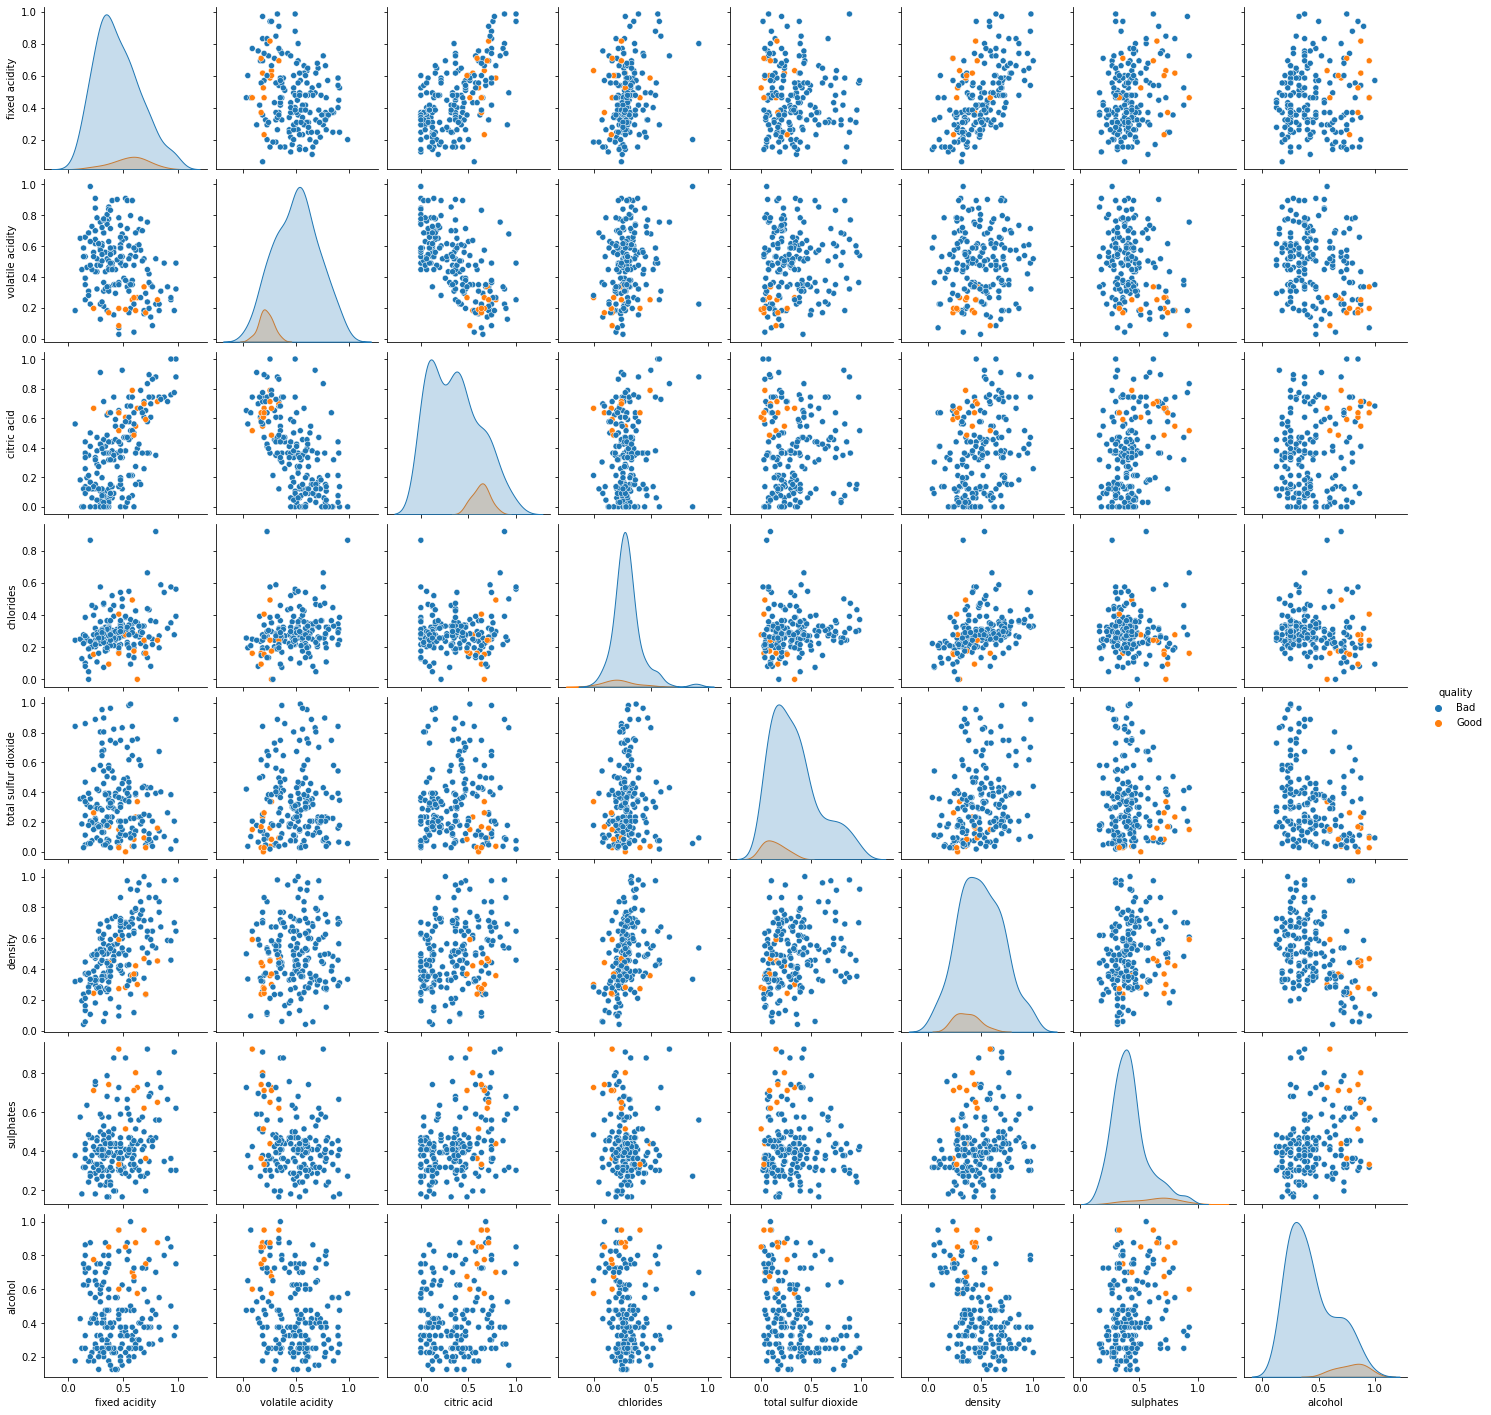

In [60]:
sns.pairplot(data=result, hue="quality")